In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('feature_engineered_laptop.csv')
df

TypeName  Inches ScreenResolution            Cpu  Ram  \
0              Ultrabook    13.3        2560x1600       Intel i5    8   
1              Ultrabook    13.3         1440x900       Intel i5    8   
2               Notebook    15.6        1920x1080       Intel i5    8   
3              Ultrabook    15.4        2880x1800       Intel i7   16   
4              Ultrabook    13.3        2560x1600       Intel i5    8   
...                  ...     ...              ...            ...  ...   
1298  2 in 1 Convertible    14.0        1920x1080       Intel i7    4   
1299  2 in 1 Convertible    13.3        3200x1800       Intel i7   16   
1300            Notebook    14.0         1366x768  Intel Celeron    2   
1301            Notebook    15.6         1366x768       Intel i7    6   
1302            Notebook    15.6         1366x768  Intel Celeron    4   

           OpSys  Weight        Price TouchScreen   HDD  SSD  SSHD  FStorage  
0          macOS    1.37   71378.6832          No     0  128     0         0  
1          macOS    1.34   47895.5232          No     0    0     0       128  
2          No OS    1.86   30636.0000          No     0  256     0         0  
3          macOS    1.83  135195.3360          No     0  512     0         0  
4          macOS    1.37   96095.8080          No     0  256     0         0  
...          ...     ...          ...         ...   ...  ...   ...       ...  
1298  Windows 10    1.80   33992.6400         Yes     0  128     0         0  
1299  Windows 10    1.30   79866.7200         Yes     0  512     0         0  
1300  Windows 10    1.50   12201.1200          No     0    0     0        64  
1301  Windows 10    2.19   40705.9200          No  1000    0     0         0  
1302  Windows 10    2.20   19660.3200          No   500    0     0         0  

[1303 rows x 13 columns]

In [10]:
#moved price column to the end

df['Laptop_Price']= df['Price']
df.drop(columns=['Price'], inplace = True)


KeyError: 'Price'

In [11]:
df

TypeName  Inches ScreenResolution            Cpu  Ram  \
0              Ultrabook    13.3        2560x1600       Intel i5    8   
1              Ultrabook    13.3         1440x900       Intel i5    8   
2               Notebook    15.6        1920x1080       Intel i5    8   
3              Ultrabook    15.4        2880x1800       Intel i7   16   
4              Ultrabook    13.3        2560x1600       Intel i5    8   
...                  ...     ...              ...            ...  ...   
1298  2 in 1 Convertible    14.0        1920x1080       Intel i7    4   
1299  2 in 1 Convertible    13.3        3200x1800       Intel i7   16   
1300            Notebook    14.0         1366x768  Intel Celeron    2   
1301            Notebook    15.6         1366x768       Intel i7    6   
1302            Notebook    15.6         1366x768  Intel Celeron    4   

           OpSys  Weight TouchScreen   HDD  SSD  SSHD  FStorage  Laptop_Price  
0          macOS    1.37          No     0  128     0         0    71378.6832  
1          macOS    1.34          No     0    0     0       128    47895.5232  
2          No OS    1.86          No     0  256     0         0    30636.0000  
3          macOS    1.83          No     0  512     0         0   135195.3360  
4          macOS    1.37          No     0  256     0         0    96095.8080  
...          ...     ...         ...   ...  ...   ...       ...           ...  
1298  Windows 10    1.80         Yes     0  128     0         0    33992.6400  
1299  Windows 10    1.30         Yes     0  512     0         0    79866.7200  
1300  Windows 10    1.50          No     0    0     0        64    12201.1200  
1301  Windows 10    2.19          No  1000    0     0         0    40705.9200  
1302  Windows 10    2.20          No   500    0     0         0    19660.3200  

[1303 rows x 13 columns]

In [12]:
df.shape

(1303, 13)

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='TypeName', ylabel='Laptop_Price'>

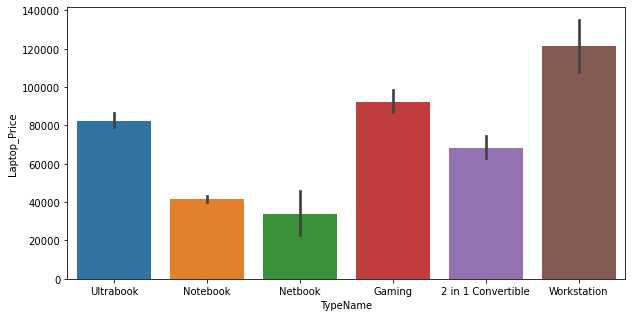

In [15]:
plt.subplots(figsize=(10,5))
sns.barplot(x='TypeName',y='Laptop_Price',data=df)

As can be seen, on average, workstation laptops are higher priced than other category of laptops. This is to be expected as workstation laptops have higher spec configurations (better cpu, more memory, faster clockspeed, etc) to meet the demands of clients in the proffesional workspace.

Gaming laptops present the second highest priced category of laptops due to the same reasons as above.

Ultrabooks and 2 in 1 convertibles are cheaper than gaming laptops (on average). 

Notebooks and netbooks are relatively cheaper than other category of laptops.

<AxesSubplot:xlabel='Inches', ylabel='Laptop_Price'>

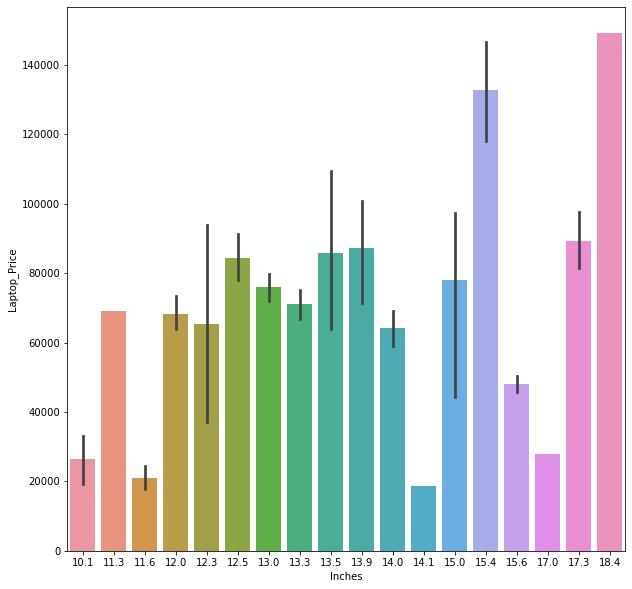

In [16]:
plt.subplots(figsize=(10,10))
sns.barplot(x='Inches',y='Laptop_Price',data=df)

Here we can see that the price of laptops can't solely be judge through the size of their displays (no direct linear correlation between screen size and price). This feature will still be kept for modelling later (high variance).

<AxesSubplot:xlabel='ScreenResolution', ylabel='Laptop_Price'>

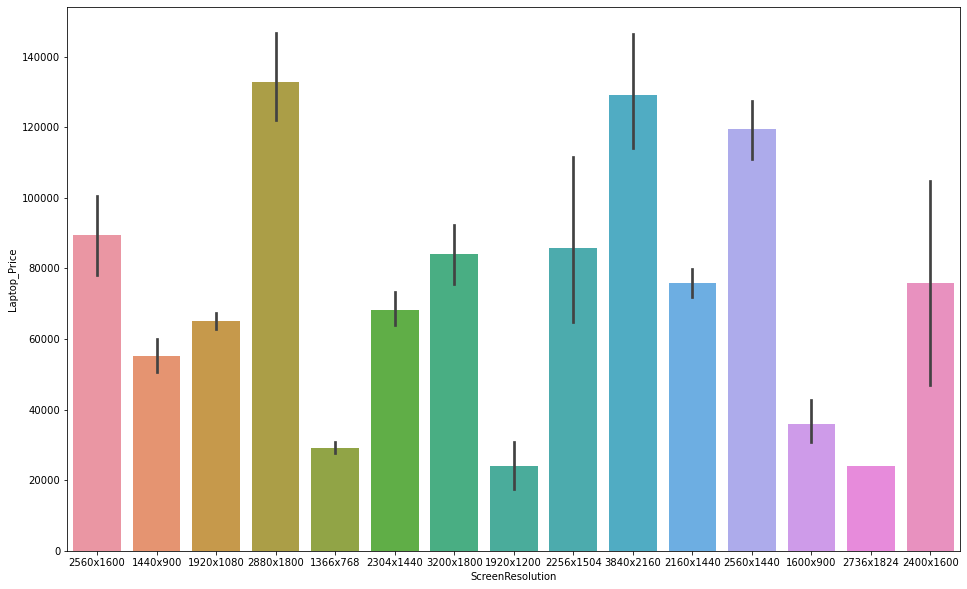

In [17]:
plt.subplots(figsize=(16,10))
sns.barplot(x='ScreenResolution',y='Laptop_Price',data=df)

Screens have higher resolutions are generally higher priced. However , an outlier resolution , specifically (2736 * 1824) is lower priced than others. 

In [18]:
resolutionList = list(df['ScreenResolution'].unique())

print("%-20s%s"%("Resoltuion","Count"))
for i in resolutionList:
    print("%-20s%d"%(i,list(df['ScreenResolution']).count(i)))

Resoltuion          Count
2560x1600           6
1440x900            4
1920x1080           841
2880x1800           4
1366x768            308
2304x1440           6
3200x1800           27
1920x1200           5
2256x1504           6
3840x2160           43
2160x1440           2
2560x1440           23
1600x900            23
2736x1824           1
2400x1600           4


Since there's only 1 laptop with outlier resolution (2736 x 1824), this laptop would be removed.

In [19]:
#REmoval of laptop with outlier resolution
df = df.loc[~df['ScreenResolution'].str.contains('2736x1824')]
df['ScreenResolution'].unique()
print(df.shape)

(1302, 13)


<AxesSubplot:xlabel='TouchScreen', ylabel='Laptop_Price'>

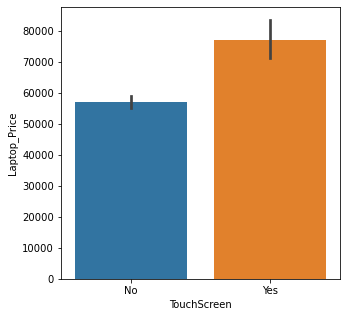

In [20]:
plt.subplots(figsize=(5,5))
sns.barplot(x='TouchScreen',y='Laptop_Price',data=df)

Laptops with touchscreen capabilities are priced higher on average.

<AxesSubplot:xlabel='Cpu', ylabel='Laptop_Price'>

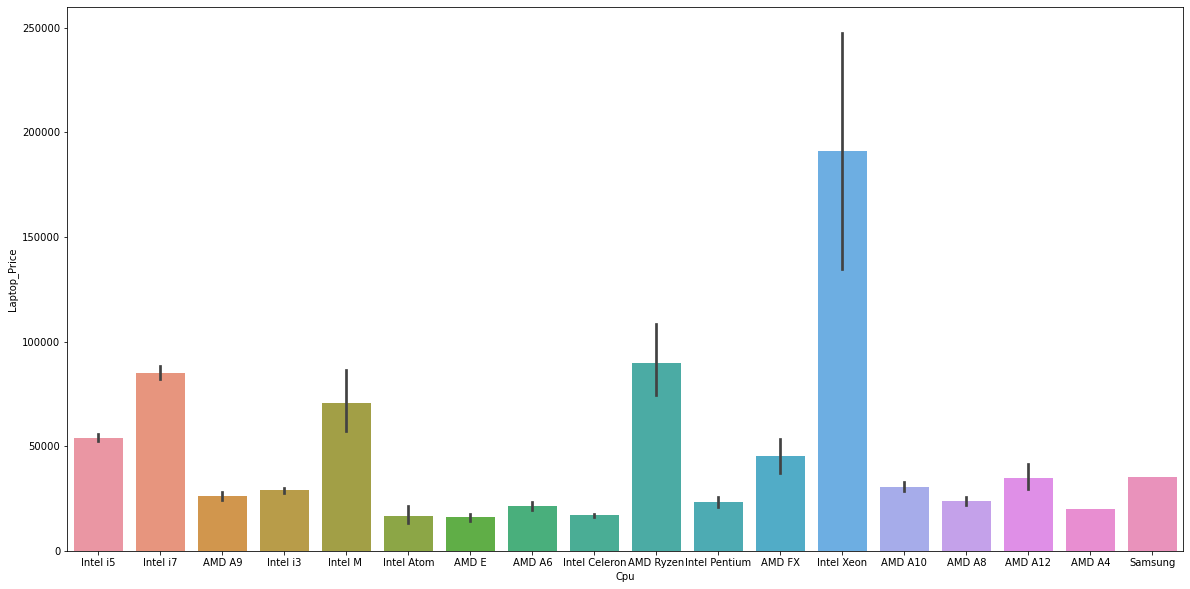

In [21]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Cpu',y='Laptop_Price',data=df)

Higher powered processors/CPU are generally higher priced (Xeon > i7>i5>i3). The same goes for AMD CPus (Ryzen > AMD A series> E series...). Interestingly, laptops with intel M processors are higher priced than intel i5 processors (which is not expected as intel core M processors are lower powered CPUs). 

In [22]:
standby_df = df.loc[df['Cpu'].str.contains('Intel M |Intel i5')]
standby_df.groupby(['Cpu']).mean()

Inches       Ram    Weight         HDD         SSD      SSHD  \
Cpu                                                                         
Intel M   12.521053  7.789474  1.088421    0.000000  255.157895  0.000000   
Intel i5  14.802600  6.959811  1.900095  325.361702  159.659574  5.929078   

           FStorage  Laptop_Price  
Cpu                                
Intel M   87.578947  70555.058526  
Intel i5   3.026005  54080.012426

As shown above, Intel M laptops a higher average in RAM capacity and SSD capacity than Intel i5 laptops. Intel M laptops are also much lighter than Intel i5 laptops. These factors contribute to the higher average prices for intel M laptops.

<AxesSubplot:xlabel='Ram', ylabel='Laptop_Price'>

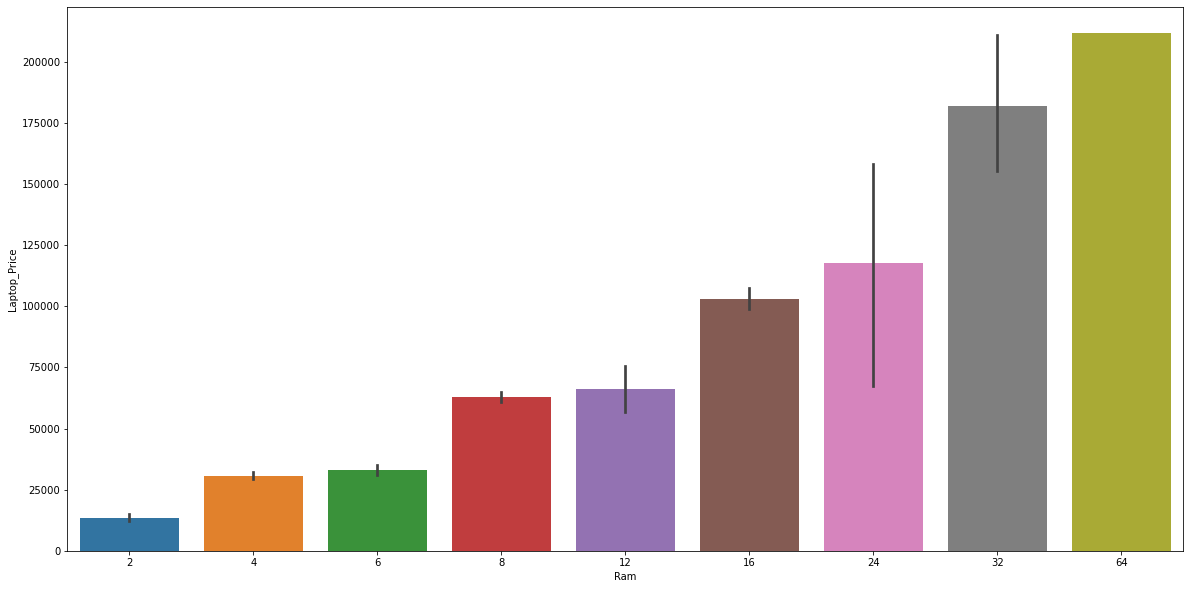

In [23]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Ram',y='Laptop_Price',data=df)

laptops with higher ram shows higher prices

<AxesSubplot:xlabel='OpSys', ylabel='Laptop_Price'>

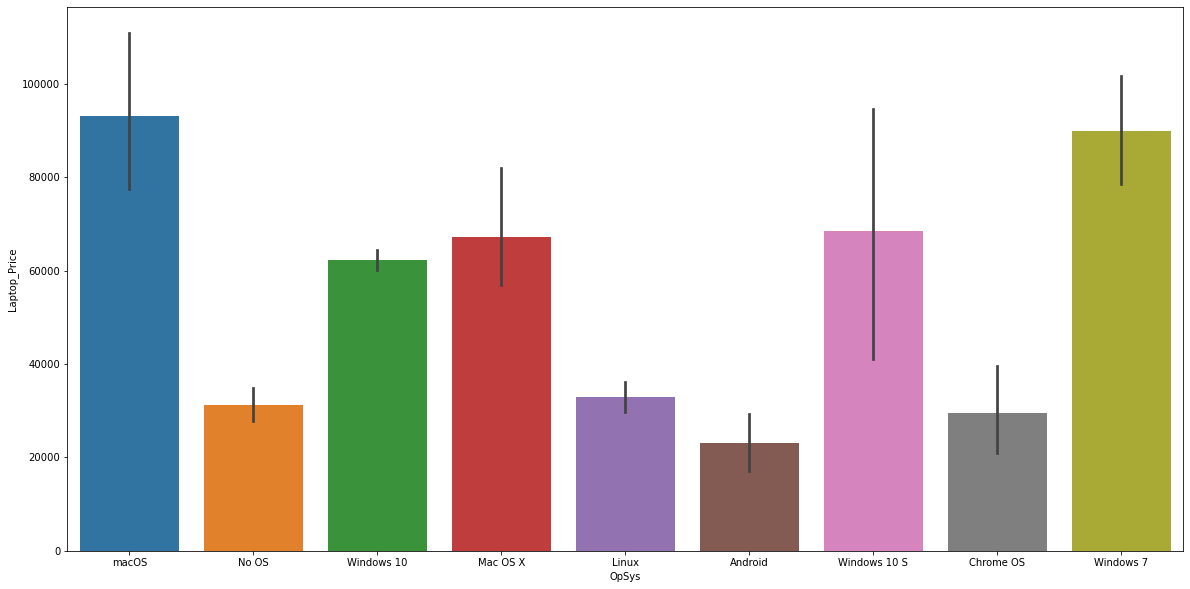

In [24]:
plt.subplots(figsize=(20,10))
sns.barplot(x='OpSys',y='Laptop_Price',data=df)

In [25]:
df.corr()

Inches       Ram    Weight       HDD       SSD      SSHD  \
Inches        1.000000  0.237658  0.827674  0.531531 -0.109293  0.054003   
Ram           0.237658  1.000000  0.383697  0.097622  0.603827  0.038430   
Weight        0.827674  0.383697  1.000000  0.515695 -0.063402  0.095119   
HDD           0.531531  0.097622  0.515695  1.000000 -0.400639 -0.076773   
SSD          -0.109293  0.603827 -0.063402 -0.400639  1.000000 -0.059862   
SSHD          0.054003  0.038430  0.095119 -0.076773 -0.059862  1.000000   
FStorage     -0.227583 -0.059563 -0.178792 -0.116794 -0.146829 -0.014246   
Laptop_Price  0.066901  0.742988  0.209803 -0.096326  0.670799  0.007921   

              FStorage  Laptop_Price  
Inches       -0.227583      0.066901  
Ram          -0.059563      0.742988  
Weight       -0.178792      0.209803  
HDD          -0.116794     -0.096326  
SSD          -0.146829      0.670799  
SSHD         -0.014246      0.007921  
FStorage      1.000000     -0.039126  
Laptop_Price -0.039126      1.000000

<AxesSubplot:>

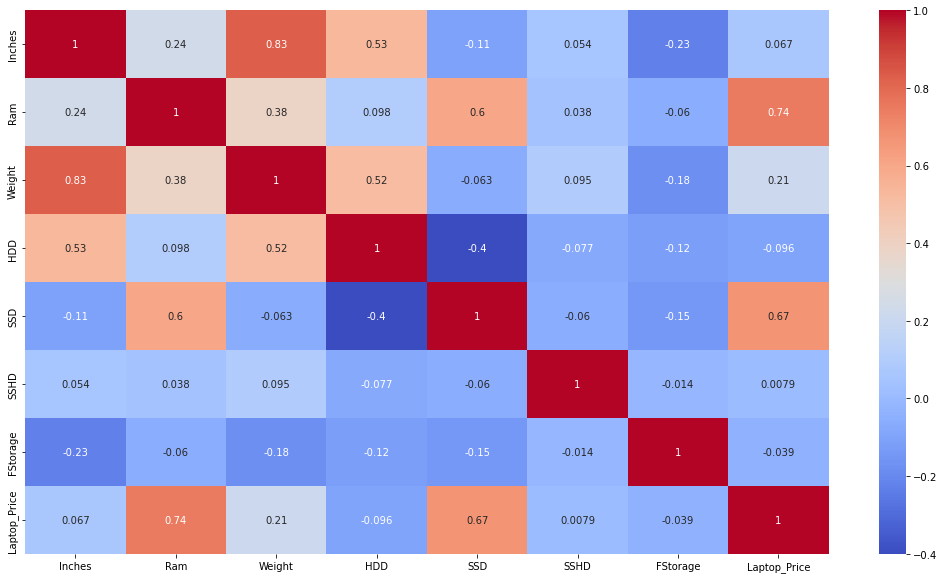

In [26]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")

# Saving EDA-ed data to csv file

In [28]:
df.to_csv('EDA_Laptop.csv',index=False)